# Exercise for the Introduction to Pandas

### Import
**A.** Import the libraries necessary to work with data frames in Python and to work with SQLite databases!

In [1]:
import pandas as pd
from pandas.io import sql
import sqlite3
import numpy as np

### Read data from SQLite database
**B.** Read the data about cars towed in Chicago from the SQLite database `data/towed.db`. When doing so, make sure that the date contained in the coulmn of the same name is really interpreted as a date! 

**Hints**
1. you can find the documentation for `pandas.io.sql.read_sql()` [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html)
2. the data format compatible with `strftime` available here is `%m/%d/%Y`

In [2]:
conn = sqlite3.connect('data/towed.db')
query = "SELECT * FROM towed ;"

towed = sql.read_sql(query, con=conn, parse_dates={'date': {'format': '%m/%d/%Y'}})

## Pandas and SQL
It is recommended that you solve the following tasks in parallel using an SQLite-GUI to build the corresponding SQL queries. The SQL equivalent for the pandas operations should also be given here!

### Overview over the data
**C.** First, look at
1. the first five data sets
2. then at the data sets number 100 - 104 and
3. finally check the *structure* of the data set!

#### SQL equivalent
```SQL
SELECT * 
FROM towed 
LIMIT 5;
```

In [3]:
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


#### SQL equivalent
```SQL
SELECT * 
FROM towed 
WHERE ROWID BETWEEN 100 and 104;
```

In [4]:
towed[99:104]

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
99,2014-11-18,CHRY,4D,,WHI,V860615,IL,701 N. Sacramento,(773) 265-7605,6798306
100,2014-11-18,FORD,4D,,SIL,B9455,NB,10300 S. Doty,(773) 568-8495,2750400
101,2014-11-18,BMW,4D,,WHI,V960806,IL,400 E. Lower Wacker,(312) 744-7550,917087
102,2014-11-18,DODG,PK,TK,RED,1382871B,IL,10300 S. Doty,(773) 568-8495,2750398
103,2014-11-18,CHEV,4D,,TAN,V356714,IL,10300 S. Doty,(773) 568-8495,2750397


#### SQL equivalent
```SQL
pragma table_info('towed');
```

In [5]:
towed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [6]:
towed.dtypes

date              datetime64[ns]
make                      object
style                     object
model                     object
color                     object
plate                     object
state                     object
towed_to                  object
facility_phone            object
inventory_num              int64
dtype: object

### Simple Queries
**D.** Disply the cars towed on November 4th, 2014

#### SQL equivalent
```SQL
SELECT *
FROM towed
WHERE date = '11/04/2014';
```

In [7]:
towed[towed.date == '2014-11-04']

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
...,...,...,...,...,...,...,...,...,...,...
1415,2014-11-04,INFI,4D,,BLK,V682152,IL,701 N. Sacramento,(773) 265-7605,6797178
1416,2014-11-04,SUZI,LL,,TAN,E259378,IL,701 N. Sacramento,(773) 265-7605,6797177
1417,2014-11-04,MASE,4D,,GRY,,IL,10300 S. Doty,(773) 568-8495,2749377
1418,2014-11-04,CHEV,2D,,BLU,V609354,IL,10300 S. Doty,(773) 568-8495,2749378


### Indexing
**E.** Use the date-column as the index!

In [8]:
towed_date_index = towed.set_index('date')


### Further Queries
**F.1.** Display the information about cars towed on November 4th, 2014 (first 5 rows)

#### SQL equivalent
```SQL
SELECT *
FROM towed
WHERE date = '11/04/2014'
LIMIT 5; 
```

In [9]:
#towed[towed.date == '2014-11-04'].head()
towed_date_index.loc['2014-11-04'].head()

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244


**F.2** Display the date and make of the cars towed on November 4th, 2014.

#### SQL equivalent
```SQL
SELECT date, make
FROM towed
WHERE date = '11/04/2014';
```

In [10]:
#towed[towed.date == '2014-11-04'][['date','make']]
towed_date_index.loc['2014-11-04'][['make']]

,make
date,
2014-11-04,LINC
2014-11-04,CHRY
2014-11-04,PLYM
2014-11-04,CHEV
2014-11-04,CHEV
...,...
2014-11-04,INFI
2014-11-04,SUZI
2014-11-04,MASE


**F.3** Display the date, make, color and state of the cars towed.

#### SQL equivalent
```SQL
SELECT date, make, color, state
FROM towed
WHERE date = '11/04/2014';
```

In [11]:
#towed[towed.date == '2014-11-04'][['date','make','color','state']]
towed_date_index.loc['2014-11-04'][['make','color','state']]

,make,color,state
date,,,
2014-11-04,LINC,GRN,IL
2014-11-04,CHRY,BLU,IL
2014-11-04,PLYM,GRN,IL
2014-11-04,CHEV,BLK,IL
2014-11-04,CHEV,SIL,MO
...,...,...,...
2014-11-04,INFI,BLK,IL
2014-11-04,SUZI,TAN,IL
2014-11-04,MASE,GRY,IL


### Filter Conditions
**F.4** Display all the FORDs towed (ordered descendingly by state)

#### SQL equivalent
```SQL
SELECT *
FROM towed
WHERE make = 'FORD'
ORDER BY state DESC;
```

In [12]:
#towed.loc[towed['make'] == 'FORD'].sort_values('state', ascending=False)
#towed[towed['make'] == 'FORD'].sort_values('state', ascending=False)
towed.query('make == "FORD"').sort_values('state', ascending=False)

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
898,2014-11-10,FORD,4D,,BLU,250WLU,WI,701 N. Sacramento,(773) 265-7605,6797787
1267,2014-11-06,FORD,4D,,GRN,217WCX,WI,701 N. Sacramento,(773) 265-7605,6797379
1070,2014-11-08,FORD,LL,,BLK,635FJE,WI,10300 S. Doty,(773) 568-8495,2749537
2457,2014-10-19,FORD,LL,,BLK,178WDL,WI,10300 S. Doty,(773) 568-8495,464400
3054,2014-10-06,FORD,2D,,ONG,198WJX,WI,701 N. Sacramento,(773) 265-7605,6794908
...,...,...,...,...,...,...,...,...,...,...
2865,2014-10-11,FORD,VN,TK,WHI,,,10300 S. Doty,(773) 568-8495,2747526
1101,2014-11-07,FORD,2T,,YEL,,,10300 S. Doty,(773) 568-8495,2749498
2770,2014-10-13,FORD,4D,,GLD,,,10300 S. Doty,(773) 568-8495,2747702
1991,2014-10-26,FORD,LL,TK,WHI,,,701 N. Sacramento,(773) 265-7605,6796635


**F.5** Display all black towed cars from the state of **MI**chigan!

#### SQL equivalent
```SQL
SELECT *
FROM towed
WHERE color = 'BLK' AND state = 'MN';
```

In [13]:
towed.query('color == "BLK" & state == "MN"')

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
196,2014-11-17,CHEV,4D,,BLK,982NJV,MN,701 N. Sacramento,(773) 265-7605,6798261
1396,2014-11-04,FORD,LL,,BLK,796ERG,MN,701 N. Sacramento,(773) 265-1846,1532877
1481,2014-11-02,HOND,2D,,BLK,866MME,MN,10300 S. Doty,(773) 568-8495,464548
4653,2014-08-28,JEEP,LL,,BLK,731BTM,MN,701 N. Sacramento,(773) 265-7605,6791660


**F.6** Display all towed **PORS**ches or <b>N</b>ew **Y**orker's (order by make (ascending) and color (descending))!

#### SQL equivalent
```SQL
SELECT *
FROM towed
WHERE make = 'PORS' OR state = 'NY'
ORDER BY make ASC, color DESC;

```

In [14]:
towed.query('make == "PORS" | state == "NY"').sort_values(['make','color'], ascending=[True,False])

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
3302,2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
3303,2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
843,2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2974,2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
1585,2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
3385,2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
3624,2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
4459,2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


### Masks
**F.7** Create a filter mask for the cars in 4D style from **IL**linnois!

#### SQL equivalent
```SQL
CREATE VIEW 'fourDstyleIL' AS
SELECT *
FROM towed
WHERE style = '4D' AND state = 'IL'

CREATE VIEW 'fourDstyleILMask' AS
SELECT *,
CASE
WHEN style = '4D' AND state = 'IL' THEN 1
ELSE 0
END AS mask
FROM towed;

```

In [15]:
il4d = (towed['style'] == '4D') & (towed['state'] == 'IL')


**F.8** Test how many towed cars satisfy the filter condition!

#### SQL equivalent

```SQL
SELECT mask, COUNT(*) 
FROM fourDstyleILMask
GROUP BY mask;
```

In [16]:
il4d.value_counts()

True     2570
False    2495
dtype: int64

**F.9** Display the date, make, model, and color of the 4D-cars from Illinois!

#### SQL equivalent
```SQL
SELECT 
```

In [17]:
towed[il4d][['date','make','model','color']]

,date,make,model,color
1,2014-11-18,HOND,ACC,BLK
3,2014-11-18,HYUN,,SIL
4,2014-11-18,TOYT,,WHI
7,2014-11-18,CHEV,,BLK
10,2014-11-18,MERZ,,BLK
...,...,...,...,...
5057,2014-08-21,ACUR,,GRY
5058,2014-08-21,NISS,,GRY
5060,2014-08-21,HOND,,GRY
5063,2014-08-20,LEXS,,BLK


### Grouping
**G.1** Create an Object grouping the towed cars by state!

In [18]:
grouped_by_state = towed.groupby('state')
grouped_by_state

**G.2** Count the values in the respective columns of the grouping (first 5 rows)!

#### SQL equivalent
```SQL
SELECT state, COUNT(date) AS date, COUNT(make) AS make, COUNT(style) AS style, COUNT(model) AS model,
COUNT(color) AS Color, COUNT(plate) AS plate, COUNT(towed_to) AS towed_to, COUNT(facility_phone) AS facility_phone
FROM towed
GROUP BY state
LIMIT 5;
```

In [19]:
grouped_by_state.count().head() # NOT NULL records within each column

,date,make,style,model,color,plate,towed_to,facility_phone,inventory_num
state,,,,,,,,,
,74,74,74,74,74,74,74,74,74
AL,2,2,2,2,2,2,2,2,2
AR,2,2,2,2,2,2,2,2,2
AZ,7,7,7,7,7,7,7,7,7
CA,6,6,6,6,6,6,6,6,6


**G.3** Count the number of data rows of the grouping (last 5 rows)!

#### SQL equivalent
```SQL
SELECT 
```

In [20]:
grouped_by_state.size().tail() # total records for each state

state
TN     7
TX    18
VA     3
WA     3
WI    44
dtype: int64

**G.4** Display the ten states with the highest number of *distinct* cars towed (`plate` identifies the car)!

#### SQL equivalent
```SQL
    SELECT state, COUNT(DISTINCT plate)
    FROM towed
    GROUP BY state
    ORDER BY 2 DESC
    LIMIT 10;
```

In [21]:
grouped_by_state['plate'].nunique().sort_values(ascending=False)[:10]

state
IL    4301
IN     114
WI      44
MN      22
TX      18
MI      13
OH      11
GA       8
AZ       7
TN       7
Name: plate, dtype: int64

## Analysis Task
Generate a data frame / a table containing the US states and their distance to Chicago. Join this with the data frame / the table `towed`. Then try to find a correlation between the distances and the number of cars towed from the respective states.

**Hints**
1. The distance to Chicago might just be measured by the distance between Chicago and the state capitals (or some other approximation which makes sense)
2. If you create the respectibe table as a text file (csv), it can easily be used in Python or uploaded to MySQL or SQLite and therefore be used in both universes in parallel.

#### SQL equivalent
```SQL
SELECT *
FROM towed
LEFT OUTER JOIN distance_to_chicago
ON towed.state = distance_to_chicago.state
```

In [22]:
sorted(towed['state'].unique())


['',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'E1',
 'FL',
 'GA',
 'IA',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NB',
 'NC',
 'ND',
 'NH',
 'NM',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'TN',
 'TX',
 'VA',
 'WA',
 'WI']

In [23]:
#def strip(text):
#    try:
#        return text.strip()
#    except AttributeError:
#        return text
#    
headers = ['state', 'distance']
#distance = pd.read_csv('data/towed_distance_to_chicago.csv',
#                       header=0,
#                       names=headers,
#                       sep='|',
#                       encoding='utf-8',
#                       converters = {'state' : strip,
#                                    'distance' : strip,
#                                    }
#                      )
#distance['distance'].replace('', np.nan, inplace=True)
#distance.dropna(inplace=True)
distance = pd.read_csv('data/towed_distance_to_chicago.csv',
                       header=0,
                       names=headers,
                       sep='|',
                       encoding='utf-8'
                      )

distance.dtypes
distance


,state,distance
0,AR,603
1,AZ,1676
2,CA,2139
3,CO,1068
4,CT,866
5,DE,781
6,FL,1214
7,GA,872
8,IA,317
9,IL,156


In [24]:
merged = pd.merge(towed, distance, on='state', how='outer')
merged

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num,distance
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424,156.0
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129,156.0
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366,156.0
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127,156.0
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128,156.0
...,...,...,...,...,...,...,...,...,...,...,...
5060,2014-09-12,TOYT,4D,CAM,GRY,226DEN,OK,701 N. Sacramento,(773) 265-7605,6792994,820.0
5061,2014-09-07,CHEV,4D,,RED,495FVR,OK,10300 S. Doty,(773) 568-8495,2745334,820.0
5062,2014-09-01,CHEV,4T,,WHI,005201,OK,10300 S. Doty,(773) 568-8495,2744813,820.0
5063,2014-09-05,ACUR,2D,,,095RRF,NM,10300 S. Doty,(773) 568-8495,2745189,1317.0


In [25]:
value_counts = towed['state'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts = df_val_counts.reset_index()
df_value_counts.columns = ['state', 'amount'] # change column names

#df_value_counts

df = pd.merge(df_value_counts, distance, on='state', how='outer')
df.sort_values(by='distance', ascending=False)
df.dropna(inplace=True)
df.distance = pd.to_numeric(df.distance, errors='coerce')
df.sort_values(by=['distance'], ascending=True)


,state,amount,distance
0,IL,4667,156.0
1,IN,116,166.0
3,WI,44,174.0
6,MI,13,281.0
7,OH,11,314.0
15,IA,5,317.0
19,KY,3,392.0
16,MO,5,406.0
9,TN,7,533.0
4,MN,22,566.0


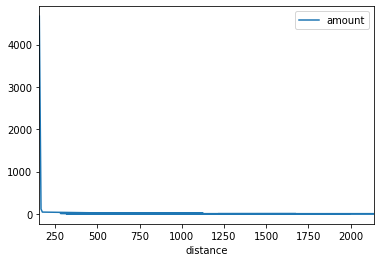

In [27]:
df.plot(x ='distance', y='amount', kind = 'line')